In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Connecting to the dataset
df = pd.read_excel('sales_data.xlsx')

#Initial data review
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns)
print("\nInfo:")
print(df.info())
print("\nStatistical summary (numerical columns):")
print(df.describe())   

Shape of dataset: (200000, 8)

Columns: Index(['Order ID', 'Date', 'Customer', 'Country', 'Category', 'Quantity',
       'Price', 'Revenue'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Order ID  200000 non-null  int64         
 1   Date      200000 non-null  datetime64[ns]
 2   Customer  200000 non-null  object        
 3   Country   200000 non-null  object        
 4   Category  200000 non-null  object        
 5   Quantity  200000 non-null  int64         
 6   Price     200000 non-null  float64       
 7   Revenue   200000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 12.2+ MB
None

Statistical summary (numerical columns):
            Order ID                           Date       Quantity  \
count  200000.000000                         20000

In [2]:
#Remove spaces and convert to lowercase
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

#Change the data type to datetime
df['date'] = pd.to_datetime(df['date'])

#Adding new columns with dates
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.strftime('%b')
df['weekday'] = df['date'].dt.day_name()

In [3]:
#Checking data for duplicates
df.duplicated(subset=['order_id']).sum()

np.int64(0)

In [4]:
#Checking the number of empty values
df.isnull().sum()

order_id      0
date          0
customer      0
country       0
category      0
quantity      0
price         0
revenue       0
year          0
month         0
month_name    0
weekday       0
dtype: int64

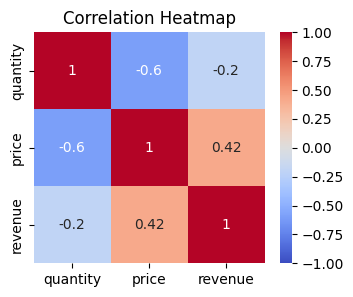

In [13]:
#Calculate the correlation dependence
corr = df[['quantity', 'price', 'revenue']].corr()

#Visualization
plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap")
plt.savefig('Correlation_Heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

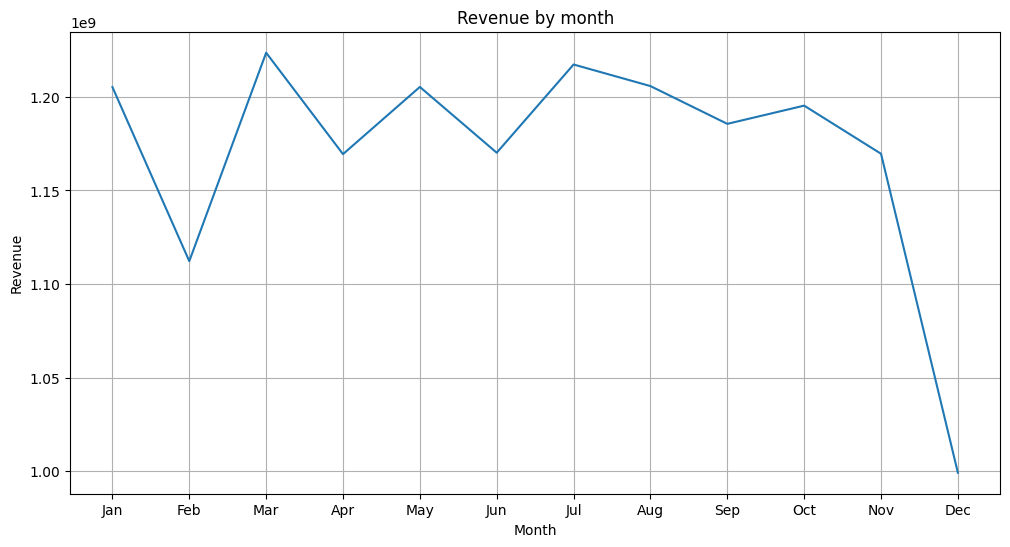

In [14]:
#Calculating sales by month
monthly = df.groupby('month_name')['revenue'].sum().reindex(
    ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
)

#Visualization
plt.figure(figsize=(12,6))
plt.plot(monthly.index, monthly.values)
plt.title('Revenue by month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.savefig('Revenue_by_month.png', dpi=300, bbox_inches='tight')
plt.show()

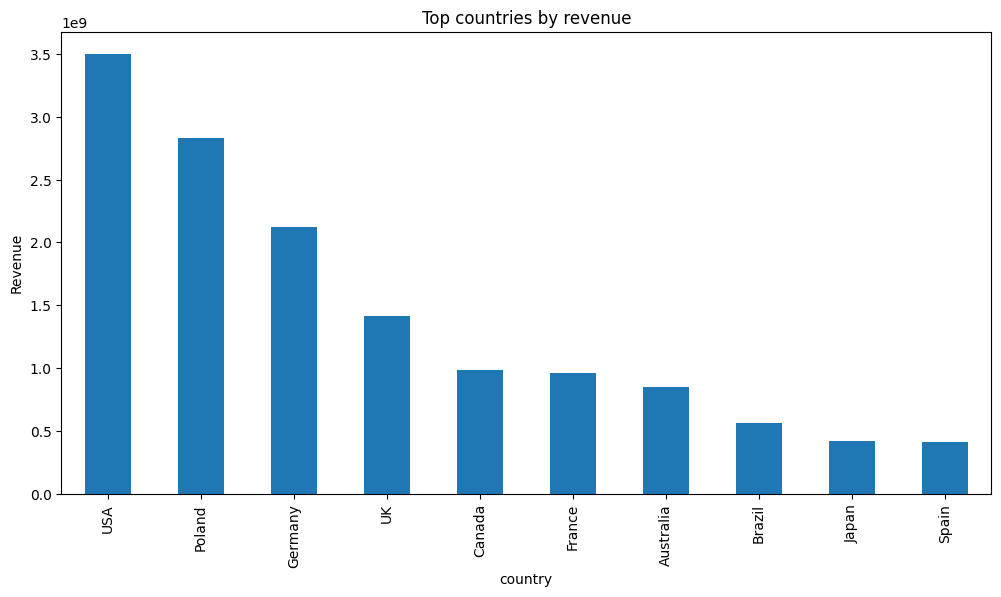

In [15]:
#Calculating sales by country
top_countries = df.groupby('country')['revenue'].sum().sort_values(ascending=False)

#Visualization
plt.figure(figsize=(12,6))
top_countries.plot(kind='bar')
plt.title('Top countries by revenue')
plt.ylabel('Revenue')
plt.savefig('Top_countries_by_revenue.png', dpi=300, bbox_inches='tight')
plt.show()

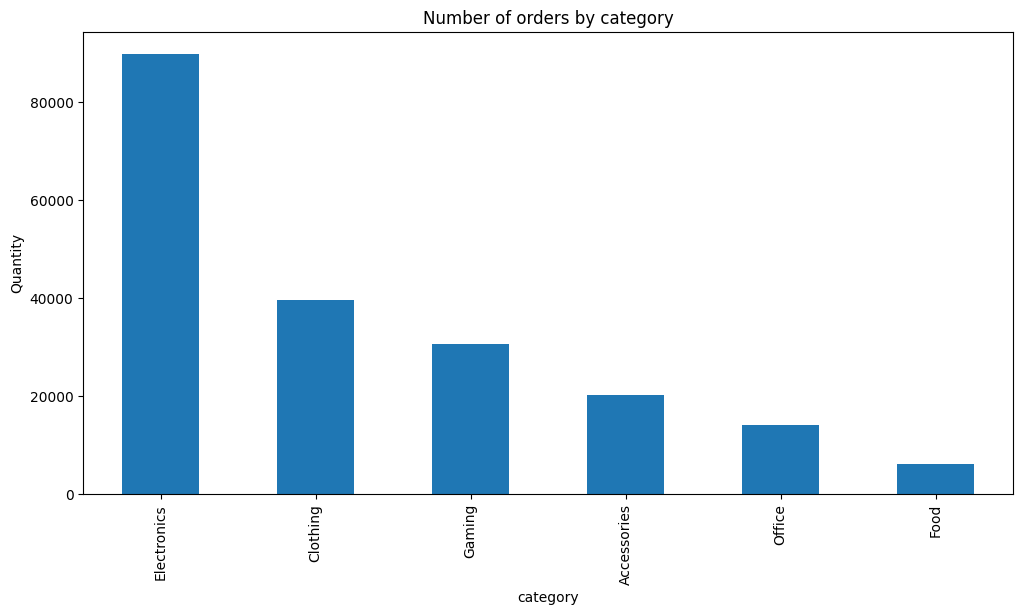

In [16]:
#Calculation of the number of orders by category and visualization
plt.figure(figsize=(12,6))
df['category'].value_counts().plot(kind='bar')
plt.title('Number of orders by category')
plt.ylabel('Quantity')
plt.savefig('Number_of_orders_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

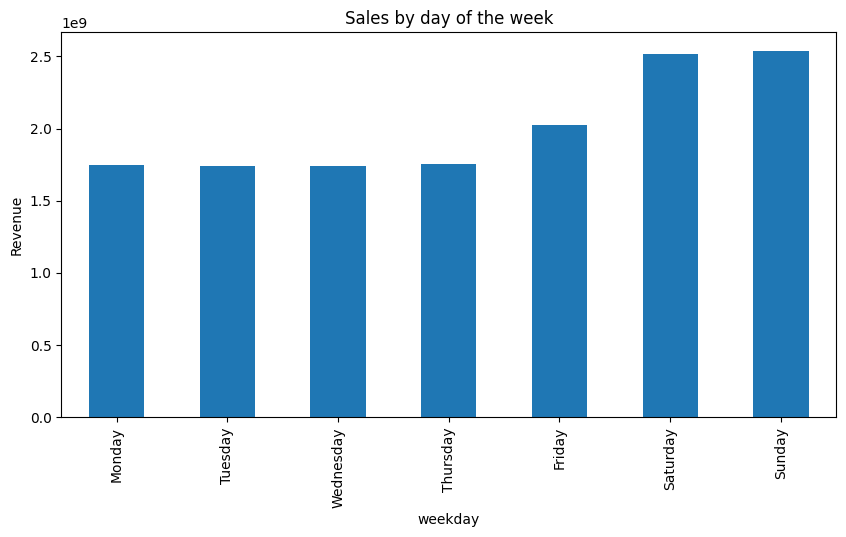

In [17]:
#Calculating sales based on the day of the week
weekday_rev = df.groupby('weekday')['revenue'].sum().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

#Visualization
plt.figure(figsize=(10,5))
weekday_rev.plot(kind='bar')
plt.title('Sales by day of the week')
plt.ylabel('Revenue')
plt.savefig('Sales_by_day_of_the_week.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#Saving the modified and cleaned dataset
df.to_excel('sales_200k_weighted_final.xlsx', index=False)